# AIN 214 - PA4 - 2023
## Building kNN and Logistic Regression Classifiers


# THE STUDENT INFO
## Student Name: MUHAMMET BATUHAN DOĞAN
## Student ID: 2210765004

# Dataset: We will use the Breast Cancer Wisconsin (Diagnostic) Dataset available on Kaggle for the assignment.
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

## 1. Data Preprocessing

In this section, you will:
- Import necessary libraries
- Load the dataset
- Handle missing values and outliers
- Convert non-numeric values to numeric
- Perform data normalization

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
path_to_dataset = 'data.csv'
df = pd.read_csv(path_to_dataset)
df_copy1 = pd.read_csv(path_to_dataset)

In [2]:
# Our data's missing values
missing_values = df.isnull().sum()
print(missing_values)

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Our missing value is 'Unnamed: 32' column

In [3]:
# I dropped the column with missing values.
df.drop('Unnamed: 32', axis=1, inplace=True)

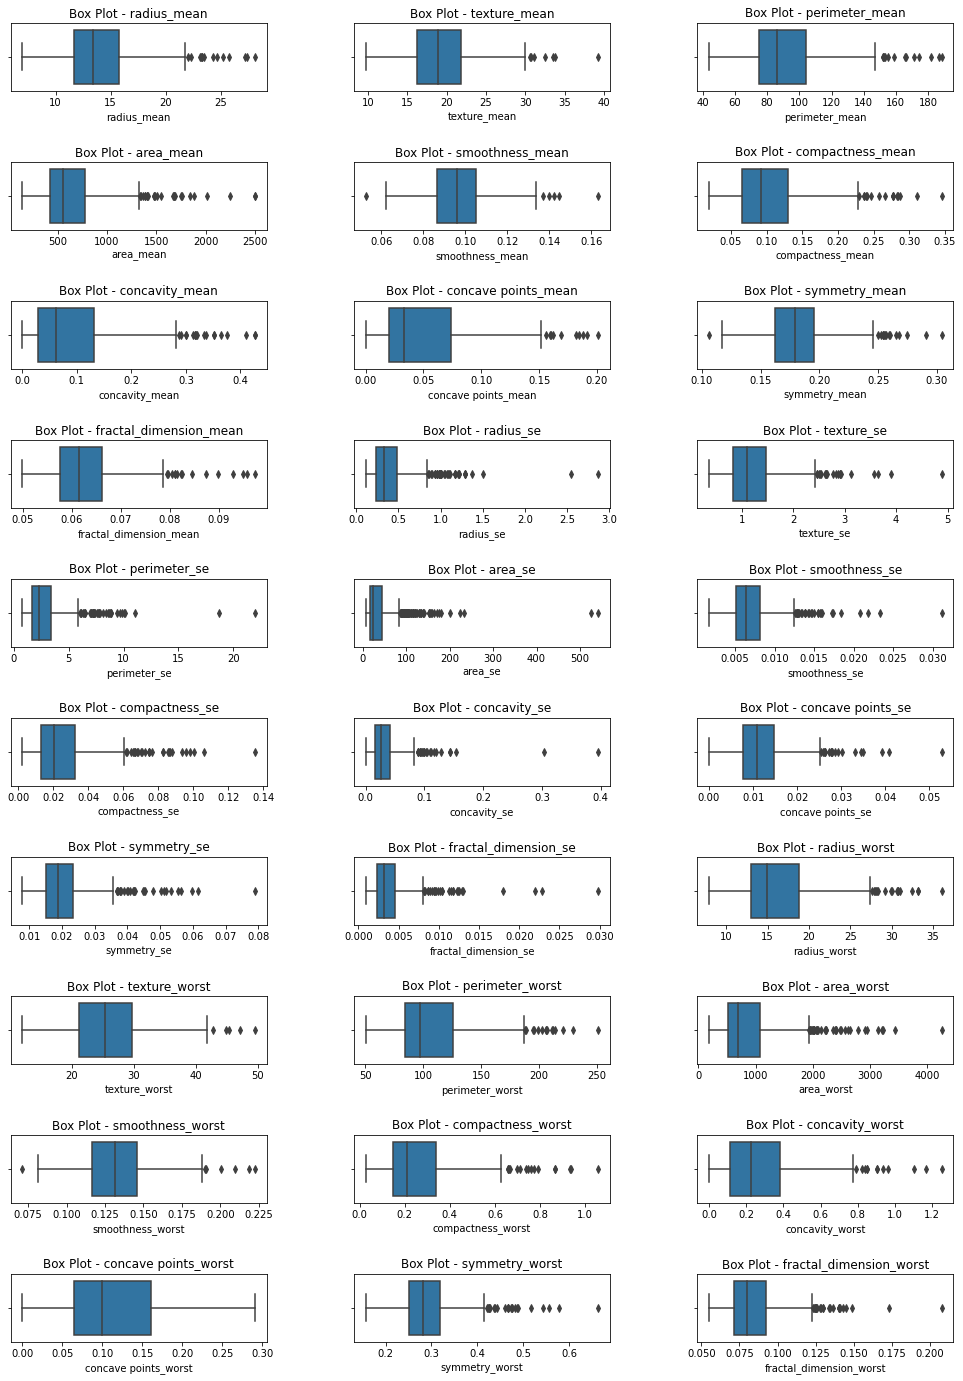

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# diagnosis is my target variable and id is identifier actually so i drop these and i use boxplot technique to see outliers.
features = df.drop(['id', 'diagnosis'], axis=1)

# Set up subplots
fig, axes = plt.subplots(nrows=len(features.columns) // 3, ncols=3, figsize=(15, 20))
fig.tight_layout(pad=5.0)  

# Box plot for my 30 features.
for i, feature in enumerate(features.columns):
    row = i // 3
    col = i % 3
    sns.boxplot(x=df[feature], ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot - {feature}')

plt.show()


In [5]:
# List of features 
my_features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

my_non_outlier_datasets = {}

for feature in my_features:
    #i calculated quartiles
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # i define lower and upper bounds
    LW = Q1 - 1.5 * IQR
    UW = Q3 + 1.5 * IQR
    
    outliers = (df[feature] < LW) | (df[feature] > UW)
    
    # Filter the dataset for the current feature
    my_non_outlier_datasets[feature] = df[~outliers]




In [6]:
#in there we see non outlier data for each feature 
for key in my_non_outlier_datasets.keys():
    print(my_non_outlier_datasets[key][key])



0      17.99
1      20.57
2      19.69
3      11.42
4      20.29
       ...  
564    21.56
565    20.13
566    16.60
567    20.60
568     7.76
Name: radius_mean, Length: 555, dtype: float64
0      10.38
1      17.77
2      21.25
3      20.38
4      14.34
       ...  
564    22.39
565    28.25
566    28.08
567    29.33
568    24.54
Name: texture_mean, Length: 562, dtype: float64
0      122.80
1      132.90
2      130.00
3       77.58
4      135.10
        ...  
564    142.00
565    131.20
566    108.30
567    140.10
568     47.92
Name: perimeter_mean, Length: 556, dtype: float64
0      1001.0
1      1326.0
2      1203.0
3       386.1
4      1297.0
        ...  
562     716.9
565    1261.0
566     858.1
567    1265.0
568     181.0
Name: area_mean, Length: 544, dtype: float64
0      0.11840
1      0.08474
2      0.10960
4      0.10030
5      0.12780
        ...   
563    0.10990
564    0.11100
565    0.09780
566    0.08455
567    0.11780
Name: smoothness_mean, Length: 563, dtype: float64


In these part we see removing outlier data for each feature. For example concavity_worst has 557 datapoints after remove outlier for this featuer so we say that our real data feature lenght - non outlier data = 569 - 557 = 12 so concavity_worst has 12 outliers. Of course my method for detecting outliers.

Another example for area_worst we see 534 data points so we say that 569 - 534 = 35 we have 35 outliers for area_worst feature.

For concave points_worst we do not have outlier which we see from boxplot and also there it has 569 datapoints after removing outlier process.

In [7]:
df = pd.get_dummies(df, columns=['diagnosis'], drop_first=True)

after this part we dropped diagnosis column and we create diagnosis_M column for Malignant 1 benign 0.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['diagnosis_M'], axis=1)  
y = df['diagnosis_M']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_normalized = scaler.fit_transform(X_train)

X_test_normalized = scaler.transform(X_test)



I did normalization in there

## 2. Data Visualization

Visualize the data to understand it better:
- Correlation heatmap
- Distribution plots for at least 3 features


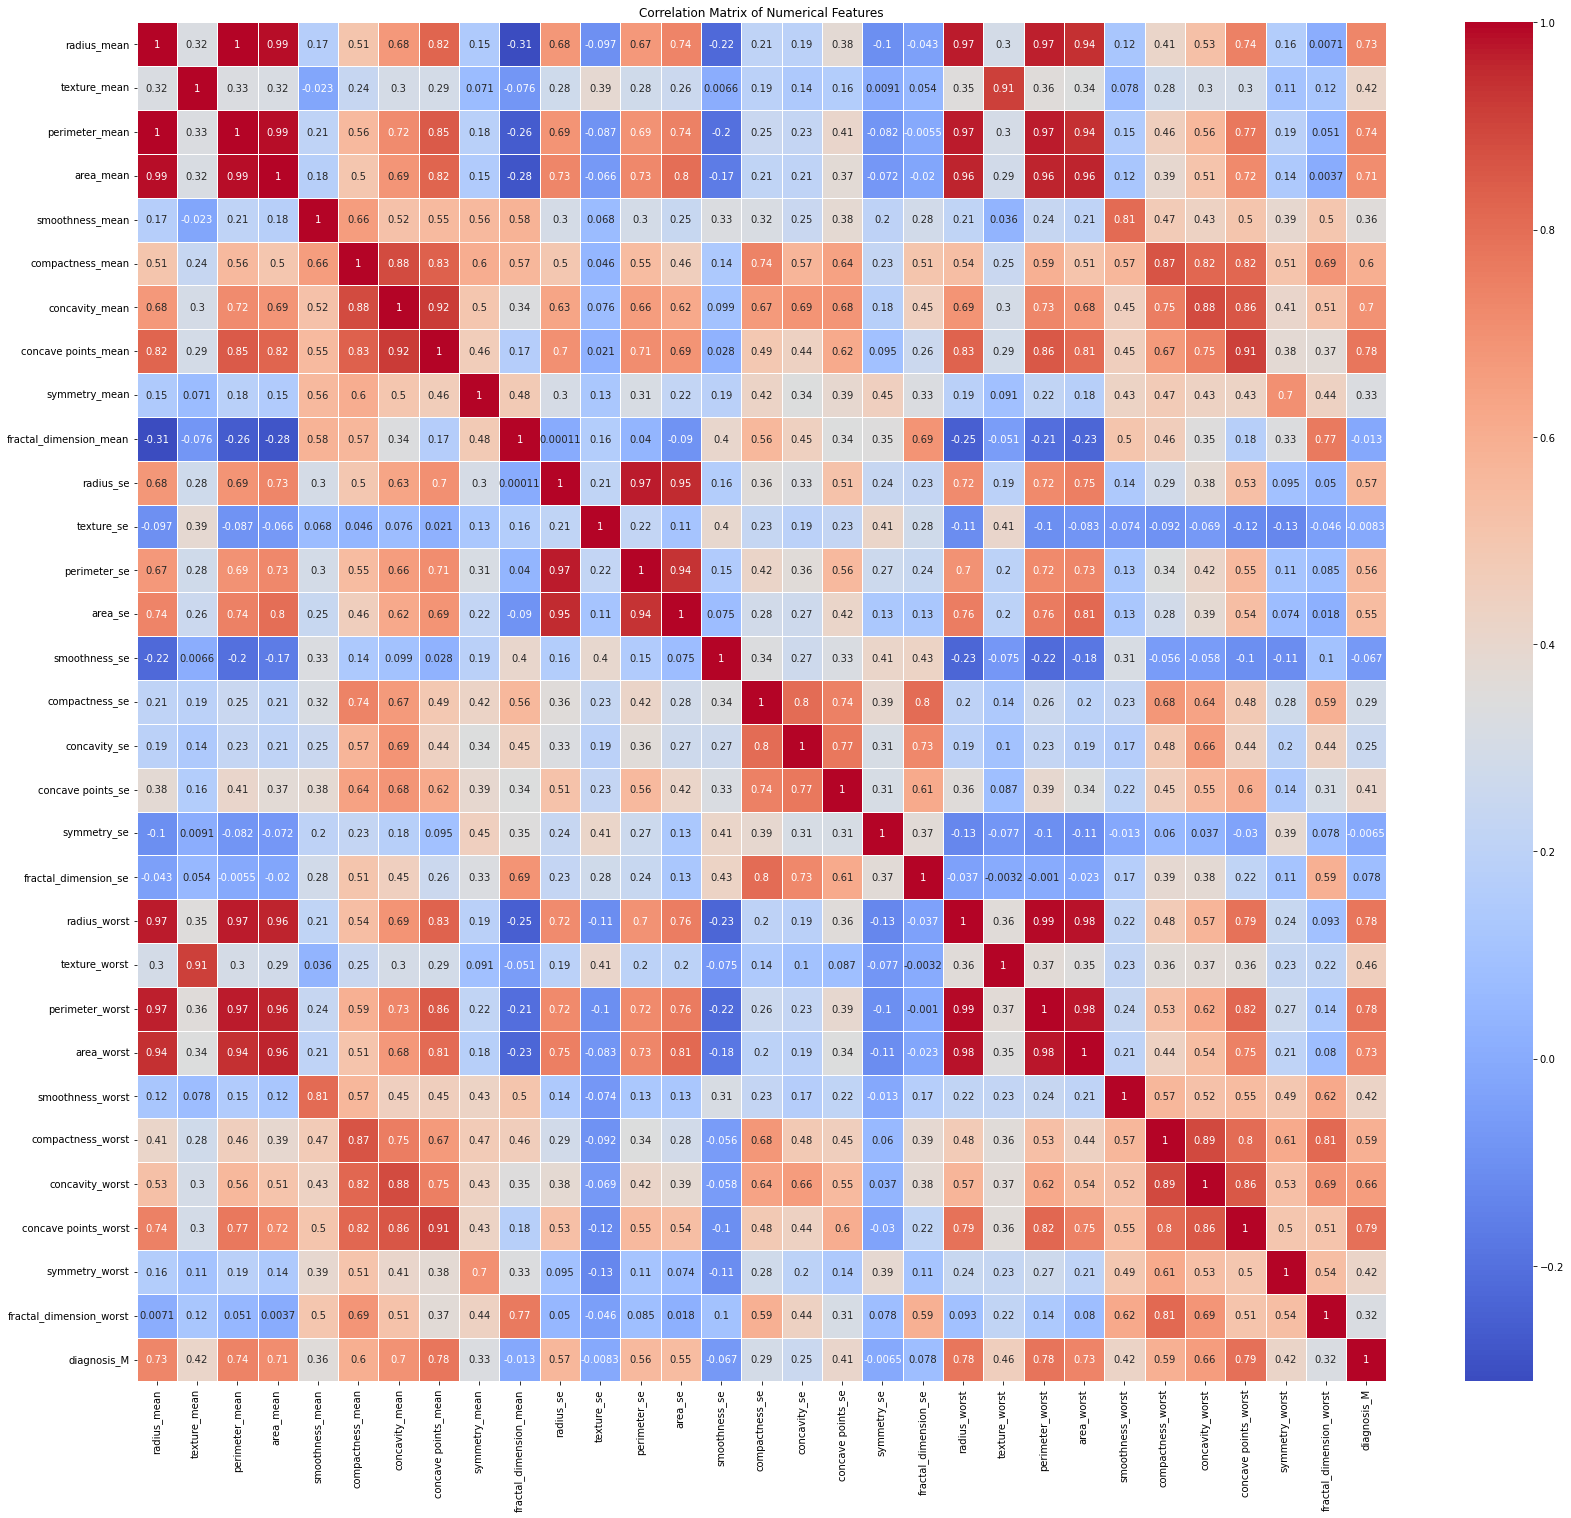

In [9]:
correlation_matrix = df.drop('id', axis=1).corr()

# i created a heatmap.
plt.figure(figsize=(28, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

coefficient of correlation is 0 t0 0.199 very weak positive relationship 

coefficient of correlation is 0.200 t0 0.399 weak positive relationship 

coefficient of correlation is 0.400 t0 0.599 medium positive relationship 

coefficient of correlation is 0.600 t0 0.799 strong positive relationship 

coefficient of correlation is 0.800 t0 1.000 very strong positive relationship

For minus sign it is same only different is negative relationship.

According to this interpretation bound we do some comment on our data such as, between area mean and radius mean there were very strong positive relationship because  correlation coefficient is 0.97.

symmetry_worst and symmetry_mean has  0.7 coefficient so they have strong positive relationship.

For radius_worst and fractal_dimension_mean we have -0.25 coefficient so we say they have weak negative relationship.

We do similar comment for other features and we understand data's relationship better.


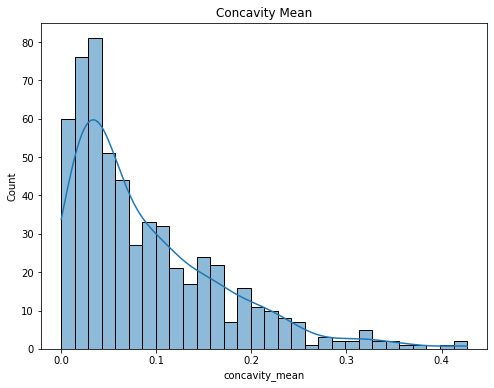

count    569.000000
mean       0.088799
std        0.079720
min        0.000000
25%        0.029560
50%        0.061540
75%        0.130700
max        0.426800
Name: concavity_mean, dtype: float64

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(df['concavity_mean'], bins=30, kde=True)
plt.title("Concavity Mean")
plt.show()

df['concavity_mean'].describe()

For concavity_mean we see it has right skewed data distribution. And we know that for right skewed data mean is larger than median. It is also seen from describe method. Mean is 0.088799 and median is 0.61540.

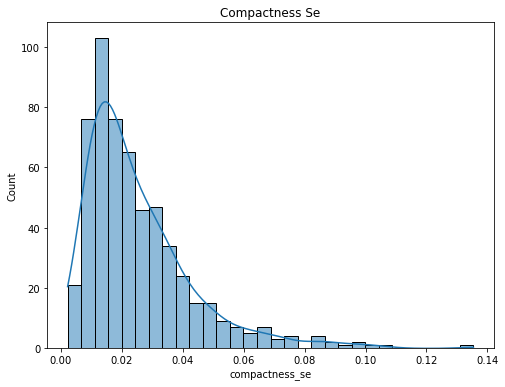

count    569.000000
mean       0.025478
std        0.017908
min        0.002252
25%        0.013080
50%        0.020450
75%        0.032450
max        0.135400
Name: compactness_se, dtype: float64

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df['compactness_se'], bins=30, kde=True)
plt.title("Compactness Se")
plt.show()

df['compactness_se'].describe()

We say almost same comment for compactness_se which we did for concavity mean

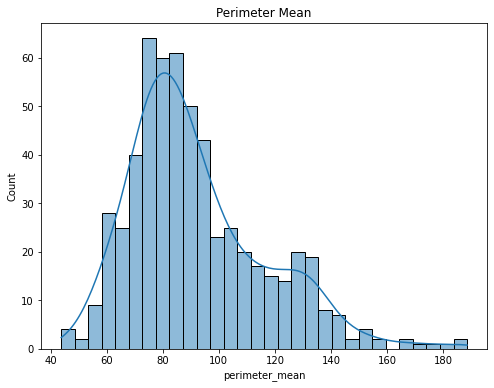

count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df['perimeter_mean'], bins=30, kde=True)
plt.title("Perimeter Mean")
plt.show()

df['perimeter_mean'].describe()

# 3 Data Splitting
Manually split the data into training and testing sets in a 70:30 ratio:

Shuffle and split the data
Avoid using predefined functions like train_test_split for this task

In [13]:
# i shuffled the dataset
shuffled_indices = np.random.permutation(len(df))
df.drop('id', axis=1, inplace=True)

df_shuffled = df.iloc[shuffled_indices].reset_index(drop=True)

# i splitted into training (70%) and testing (30%) sets
total_samples = len(df_shuffled)
train_size = int(0.7 * total_samples)

training_set = df_shuffled.iloc[:train_size]
testing_set = df_shuffled.iloc[train_size:]

X_train = training_set.drop('diagnosis_M', axis=1)
y_train = training_set['diagnosis_M']

X_test = testing_set.drop('diagnosis_M', axis=1)
y_test = testing_set['diagnosis_M']


## 4. Model Building

### 4.1. kNN Classifier

- Build and train the kNN model
- Choose the optimal k value using Minkowski distance with at least two different values for p

In [14]:
#i import necessary funtions from  scikit-learn
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [15]:
# i use cross validation to get best value for k. It is not actually wanted from us but i try both of Minkowski and validation. Using cross validation better.

k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

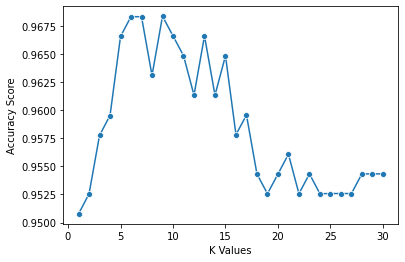

In [16]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [17]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

According to cross validation and our accuracy score plot, we say k = 9 is our best k value.

In [18]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

y_pred_knn = knn.predict(X_test)


### 4.2. Logistic Regression

- Build and train the Logistic Regression model

In [19]:
# import the  necessary class
from sklearn.linear_model import LogisticRegression

# instantiate the model 
logreg = LogisticRegression(random_state=32, max_iter=10000)
# fit data
logreg.fit(X_train, y_train)

y_pred_log= logreg.predict(X_test)

## 5. Model Evaluation

### 5.1. Confusion Matrix

Analysis of the confusion matrices for both models:
- Plot and interpret the confusion matrices
- Display accuracy, precision, recall, and F1-score for both models

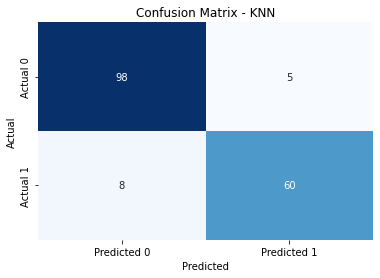

KNN Metrics:
Accuracy: 0.9240
Precision: 0.9231
Recall: 0.8824
F1 Score: 0.9023


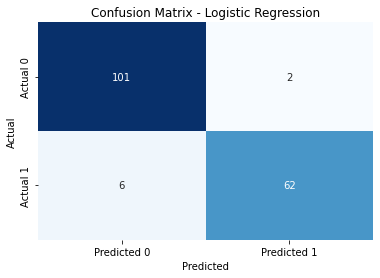


Logistic Regression Metrics:
Accuracy: 0.9532
Precision: 0.9688
Recall: 0.9118
F1 Score: 0.9394


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# KNN model evaluation
conf_matrix_knn = confusion_matrix(y_test, knn.predict(X_test))
plot_confusion_matrix(conf_matrix_knn, 'KNN')

accuracy_knn = accuracy_score(y_test, knn.predict(X_test))
precision_knn = precision_score(y_test, knn.predict(X_test), zero_division=1)
recall_knn = recall_score(y_test, knn.predict(X_test))
f1_score_knn = f1_score(y_test, knn.predict(X_test))

print("KNN Metrics:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_score_knn:.4f}")

# Logistic Regression model evaluation
conf_matrix_logreg = confusion_matrix(y_test, logreg.predict(X_test))
plot_confusion_matrix(conf_matrix_logreg, 'Logistic Regression')

accuracy_logreg = accuracy_score(y_test, logreg.predict(X_test))
precision_logreg = precision_score(y_test, logreg.predict(X_test))
recall_logreg = recall_score(y_test, logreg.predict(X_test))
f1_score_logreg = f1_score(y_test, logreg.predict(X_test))

print("\nLogistic Regression Metrics:")
print(f"Accuracy: {accuracy_logreg:.4f}")
print(f"Precision: {precision_logreg:.4f}")
print(f"Recall: {recall_logreg:.4f}")
print(f"F1 Score: {f1_score_logreg:.4f}")


Both confusion matrix has really high score for accurracy part also for precision and recall and it is so important when detecting rare outcomes.So these are almost brilliant.

### 5.2. Precision-Recall Curves

Evaluate the Precision-Recall curves for both models:
- Plot and analyze the curves

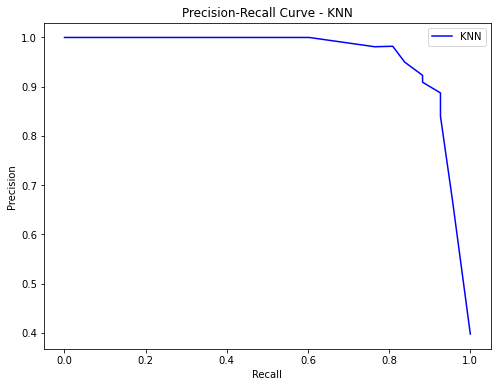

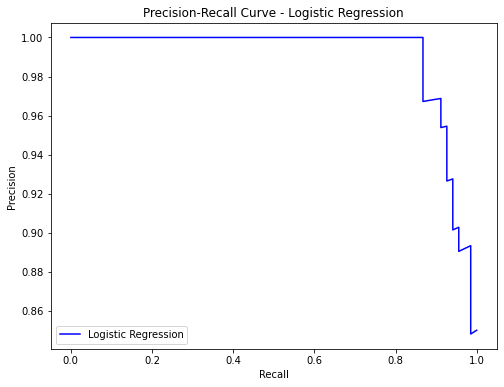

In [21]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(y_true, y_scores, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='b', label=model_name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc='best')
    plt.show()

# KNN model
y_scores_knn = knn.predict_proba(X_test)[:, 1]  # use probability estimates for positive class
plot_precision_recall_curve(y_test, y_scores_knn, 'KNN')

# Logistic Regression model
y_scores_logreg = logreg.predict_proba(X_test)[:, 1]  # use probability estimates for positive class
plot_precision_recall_curve(y_test, y_scores_logreg, 'Logistic Regression')


Both of my models have so good precision and recall curve. They almost close to ideal precison and recall curve.Logistic regression really little tiny more close to ideal plot but at the end both of them really good.

### 5.3. Choose an appropriate metric to evaulate the models. Compare the models and discuss why you chose the metric.

In [22]:
from sklearn.metrics import f1_score

# Assuming y_true is the true labels and y_pred_model1, y_pred_model2 are the predicted labels for each model
f1_model_knn = f1_score(y_test, knn.predict(X_test))
f1_model_log_reg = f1_score(y_test, logreg.predict(X_test))

print(f"F1 Score for Model KNN: {f1_model_knn:.4f}")
print(f"F1 Score for Model Logistic Regression: {f1_model_log_reg:.4f}")


F1 Score for Model KNN: 0.9023
F1 Score for Model Logistic Regression: 0.9394



My models have achieved really high F1 scores and this shows everything looks so good. When comparing the F1 scores, Logistic Regression model has a slightly higher F1 score than the KNN model.

I choose F1 score because it is well for binary classification problems, where we are interested in the performance of a model inbetween two classes. Also our dataset has imbalanced classes, 357 benign, 212 malignant. F1 score suitable for imbalanced datasets.

In imbalanced datasets, accuracy alone sometimes not a good choice because it simply predicting the majority class. But F1 score it considers both false positives and false negatives so providing a balanced measure of a model's performance.